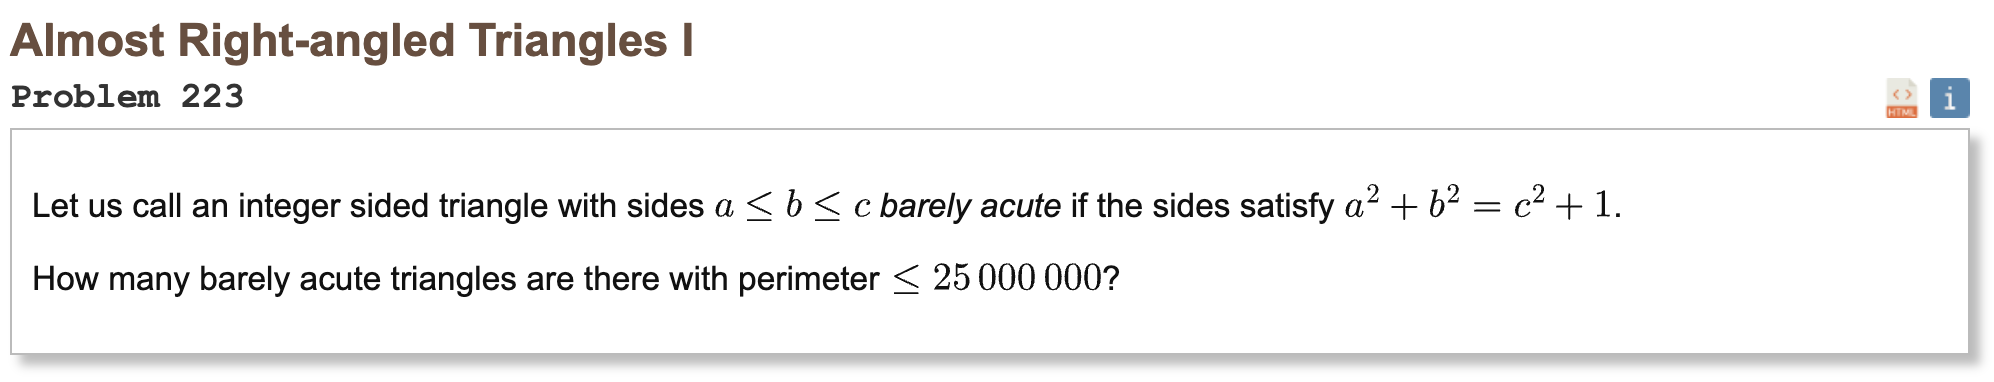

## Initial approach

* treat the condition as “almost a right triangle”, it misses being right by exactly 1 in the squared lengths
* there are simple linear transforms that take one valid triple and produce new valid triples, while keeping everything as integers
* starting from a few tiny base triangles, repeatedly apply these transforms to generate every valid triangle
* stop expanding a branch as soon as the perimeter is above the limit, because all children only get bigger
* to avoid double counting, keep the order a ≤ b and count only those generated triples that already respect that order
* run a depth first search over the generated triples and count how many have perimeter ≤ 25,000,000

In [1]:
import math

LIMIT = 25_000_000

MATS = (
    ((1, -2, 2), (2, -1, 2), (2, -2, 3)),
    ((1, 2, 2), (2, 1, 2), (2, 2, 3)),
    ((-1, 2, 2), (-2, 1, 2), (-2, 2, 3)),
)

def apply_mat(M, a, b, c):
    x = M[0][0] * a + M[0][1] * b + M[0][2] * c
    y = M[1][0] * a + M[1][1] * b + M[1][2] * c
    z = M[2][0] * a + M[2][1] * b + M[2][2] * c
    return x, y, z

def is_valid(a, b, c):
    if a <= 0 or b <= 0 or c <= 0:
        return False
    if a + b <= c:
        return False
    return a * a + b * b == c * c + 1

def solve():
    seeds = [(1, 1, 1), (1, 2, 2), (2, 1, 2)]
    stack = seeds[:]
    count = 0

    while stack:
        a, b, c = stack.pop()
        p = a + b + c
        if p > LIMIT:
            continue
        if is_valid(a, b, c) and a <= b:
            count += 1
        for M in MATS:
            x, y, z = apply_mat(M, a, b, c)
            if x > 0 and y > 0 and z > 0:
                if x + y + z <= LIMIT:
                    stack.append((x, y, z))

    return count

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 61614848
CPU times: user 2min 20s, sys: 589 ms, total: 2min 21s
Wall time: 2min 21s
